<center> <a href="https://github.com/CyConProject?tab=repositories">
  <img src="https://github.com/CyConProject/Lab/blob/main/Figures/CyCon.png?raw=true" alt="logo" width="80" >
</a>
 </center>

# K-Nearest Neighbors

In this lab, we'll dive into one of the fundamental algorithms, the k-Nearest Neighbors (k-NN) algorithm. Whether you're new to the field or looking to expand your knowledge, understanding k-NN is a crucial step in your journey.

Imagine you're trying to categorize a plant as either a rose or a daffodil based on its features, or you're determining if a customer will like a certain product based on their past preferences. These are all classification tasks where the k-NN algorithm can come into play.

At its core, k-NN is a simple yet powerful supervised machine learning algorithm used for classification and regression tasks. The main idea behind k-NN is that similar data points tend to have similar outcomes. It operates on the principle that if you're surrounded by like-minded neighbors, you're likely to share their preferences or characteristics.

The concept is quite intuitive: to classify a new data point, the algorithm looks at the 'k' closest data points in the training dataset. These neighbors cast their votes, and the majority class or average value among them determines the classification or prediction for the new data point.

### Objectives:

Throughout this lab, we will explore the key components of the k-NN algorithm, including:

- Scaling Features: Addressing the importance of feature scaling in ensuring all features contribute equally to the distance calculation.
- Choosing 'k': Investigating the impact of choosing different values for 'k' and its effects on classification outcomes.
- Distance Metrics: Understanding how to measure the similarity between data points using distance metrics like Euclidean distance or Manhattan distance.


By the end of this lab, you'll not only understand how the k-NN algorithm works but also how to apply it to real-world construction research problems. So, let's roll up our sleeves and delve into the world of k-Nearest Neighbors!

Remember, the k-NN algorithm forms the basis for more complex methods in machine learning, making it a fundamental concept to grasp. So, let's get started!

### Step 1: Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
# To suppress all warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset

In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/CyConProject/Lab/main/Datasets/glass.csv'
df = pd.read_csv(url)
# Display the first few rows of the dataset to understand its structure
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### `glass.csv`:

**Context:**
This dataset, known as the "Glass Identification Data Set" from the UCI Machine Learning Repository, is used for classifying different types of glass based on their chemical composition. It's a common dataset in pattern recognition and machine learning.

**Content:**
The dataset consists of nine attributes, including the refractive index, sodium, magnesium, aluminum, silicon, potassium, calcium, barium, and iron content in glass. These attributes are used to predict the type or class of glass.

**Type of Glass (Class Attribute):**
The target variable is the "Type of glass," which has seven discrete values representing various glass categories:

1. Building Windows Float Processed
2. Building Windows Non-Float Processed
3. Vehicle Windows Float Processed
4. Vehicle Windows Non-Float Processed (none in this database)
5. Containers
6. Tableware
7. Headlamps

This dataset is ideal for exploring classification techniques in construction research, where the goal is to identify the type of glass based on its chemical composition.

[`Data source`](https://archive.ics.uci.edu/dataset/42/glass+identification)

### Step 3: Extracting Features and Target
We extract the features (X) and the target variable (y) from the dataset. Features are all columns except 'Type,' while 'Type' represents the glass type we want to predict.

In [3]:
# Extract features (X) and target (y)
X = df.iloc[:, 0:-1]  # Exclude 'Type' column
y = df["Type"]
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


### Step 4: Create train and test datasets
We split the dataset into a training set and a testing set. In this example, we use a 70-30 split, with 70% of the data for training and 30% for testing. This helps us evaluate the model's performance on unseen data.

In [4]:
# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 5: Standardizing Features
Feature scaling is performed using StandardScaler, which standardizes features to have a mean of 0 and a standard deviation of 1. This step is essential for k-NN, as it relies on distance metrics, and scaling ensures all features contribute equally.

In [5]:
# Standardize features to have mean=0 and std=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]

array([[-0.46437783, -0.63126753,  0.60181332,  0.29373102,  0.46755793,
         0.18694211, -0.57906152, -0.34220777, -0.56134932],
       [ 0.78919945,  0.38134302,  0.58026489, -0.65267288, -0.79131687,
        -0.70439787,  0.32531334, -0.34220777, -0.56134932],
       [ 1.18659637,  1.31800777, -1.99836346, -0.90504725,  0.10248424,
        -0.68725671,  1.81157281, -0.34220777,  0.2506997 ],
       [ 0.10748603,  2.02683515, -1.43810437,  0.65126139, -0.11152448,
        -0.85866825,  0.71089953, -0.34220777, -0.56134932],
       [-0.34806653, -0.69455569,  0.51561962, -0.61061048,  0.85780912,
         0.10123634, -0.27059257, -0.34220777, -0.56134932]])

### Step 6: Initializing and Training the k-NN Classifier
We initialize the k-NN classifier with a specified value of 'k' (in this case, k=3). Then, we train the classifier on the training data.

In [6]:
# Initialize the k-NN classifier (let's choose k=3 as an example)
k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier on the training data
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Step 7: Making Predictions
We use the trained k-NN classifier to make predictions on the testing data.

In [7]:
# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)
print(y_pred[:5])
print(y_test[:5])

[1 7 1 7 2]
9      1
197    7
66     1
191    7
117    2
Name: Type, dtype: int64


### Step 8: Evaluating the Model
Finally, we evaluate the model's performance by calculating accuracy and generating a classification report, which provides detailed metrics such as precision, recall, and F1-score for each class.

In [8]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy of the k-NN classifier (k={k}): {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy of the k-NN classifier (k=3): 0.65
Classification Report:
               precision    recall  f1-score   support

           1       0.58      0.79      0.67        19
           2       0.58      0.61      0.60        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.80      0.89        10

    accuracy                           0.65        65
   macro avg       0.63      0.59      0.57        65
weighted avg       0.65      0.65      0.62        65



#### **Interpretation of the results**

- **Accuracy of the k-NN classifier (k=3): 0.65**

The accuracy score of the classifier is 0.65, which means that the model correctly classified approximately 65% of the samples in the test dataset.

- **Classification Report:**

The classification report provides more detailed information about the model's performance for each class. For example:

Class 1 (Building Windows Float Processed):

> Precision: 0.58, Recall: 0.79, F1-Score: 0.67, Support: 19

**Interpretation:** For class 1, the classifier achieved a precision of 0.58, meaning that 58% of the samples predicted as class 1 were correct. The recall of 0.79 indicates that 79% of the actual class 1 samples were correctly classified. The F1-score, which is the harmonic mean of precision and recall, is 0.67.

- **Overall Summary (Macro and Weighted Averages):**

The macro-average F1-score, which considers the unweighted average of class-specific F1-scores, is approximately 0.57.

The weighted-average F1-score, which takes into account class support (number of samples), is approximately 0.62.

These metrics provide an overall summary of the model's performance across all classes.


In summary, the k-NN classifier with k=3 achieved an accuracy of 65% on the test dataset. The classifier performed well for some classes (e.g., class 7, "Headlamps") but less so for others (e.g., class 3, "Vehicle Windows Float Processed"). The choice of k and the dataset's characteristics may influence the performance, and further experimentation or fine-tuning may be needed to improve classification results for specific classes.

### Why the value of k is important?
  <img src="https://www.kdnuggets.com/wp-content/uploads/popular-knn-metrics-0.png">


Photo by Sarang Anil Gotke on [Kdnuggets](https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html)

Here is a visual representation demonstrating the operation of the K-Nearest Neighbors (KNN) algorithm.
In the given scenario, a set of data points belonging to Class A and B are depicted. The objective is to predict the classification of a new sample. If the k value is selected to be 3, indicating the three closest data points, the prediction generated aligns with Class B. However, with an increased k value of 7, the prediction shifts to Class A.

## Practice

Let's examine the evaluation metrics obtained when training a KNN model with a k=6.

In [9]:
# Your Code Here


<details><summary>Click here for the answer</summary>

```python    
# Initialize the k-NN classifier (with k=6)
k = 6
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy of the k-NN classifier (k={k}): {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
```

</details>

# Why Test Different k Values?

1. **Bias-Variance Trade-off**: The value of k influences the model's bias and variance. Smaller values of k (e.g., k=1) tend to produce low bias but high variance models, making them sensitive to noise in the data. Larger values of k (e.g., k=20) result in higher bias but lower variance models, which might oversmooth decision boundaries. By testing multiple k values, you can strike a balance between these trade-offs.

2. **Generalization**: Different datasets and classification tasks may require different k values for optimal performance. Testing various k values helps you find the one that generalizes well to unseen data, improving the model's robustness.

3. **Domain-Specific Considerations**: In some cases, domain knowledge may guide the selection of an appropriate k value. For example, if you know that similar glass types exhibit consistent chemical patterns, you may choose a smaller k for finer-grained classification.

**Visualizing the Relationship**

One way to gain insights into the impact of k values is to visualize the relationship between k and accuracy. Here, we plotted k-values against their corresponding accuracies, allowing you to observe how the accuracy changes with different k values.

Your Experimentation Matters

As you work with k-NN or any machine learning algorithm, remember that experimentation is key. Testing different k values is just one example of how you can fine-tune your models to achieve the best results for your specific problem. Feel free to explore and experiment with various parameters, distance metrics, and preprocessing techniques (we will learn more about them in the future) to optimize your models.


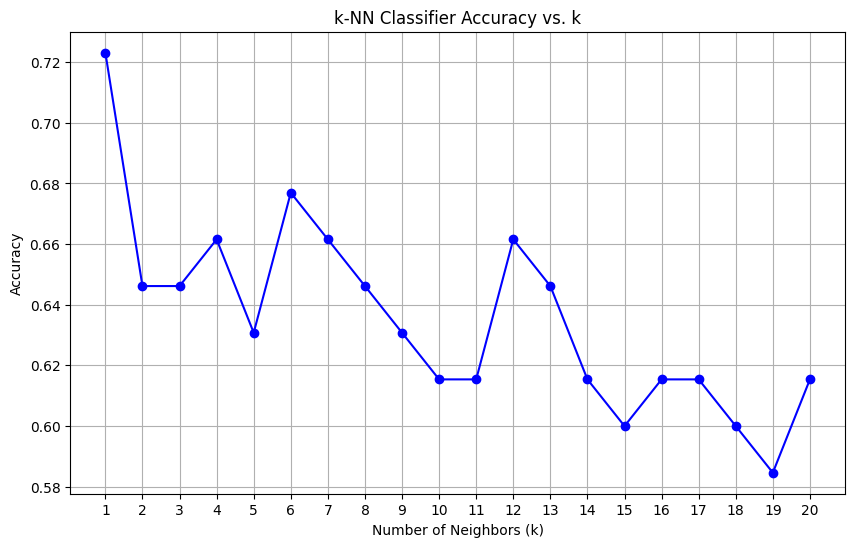

In [10]:
# Initialize lists to store k values and their corresponding accuracies
k_values = []
accuracies = []

# Test different values of k from 1 to 20
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Append k and accuracy to the lists
    k_values.append(k)
    accuracies.append(accuracy)

# Plot k-values vs. accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('k-NN Classifier Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(np.arange(1, 21, 1))
plt.show()

It's essential to consider the trade-off between bias and variance when selecting the value of k. In this case, k values between 4 and 12 seem to provide relatively stable and reasonable accuracy, considering the limited dataset size. However, further exploration and possibly cross-validation could help identify the optimal k for this specific dataset. Additionally, with only 214 instances, achieving high accuracy can be challenging, and the choice of features and preprocessing techniques also plays a critical role in model performance.

# Cross-validation to find the best K

Cross-validation is a valuable technique for finding the best value of k for a k-Nearest Neighbors (k-NN) classifier. It involves splitting the dataset into multiple subsets, training and testing the model on different combinations, and then evaluating the model's performance to find the optimal hyperparameter. Here's how you can perform cross-validation to find the best k:

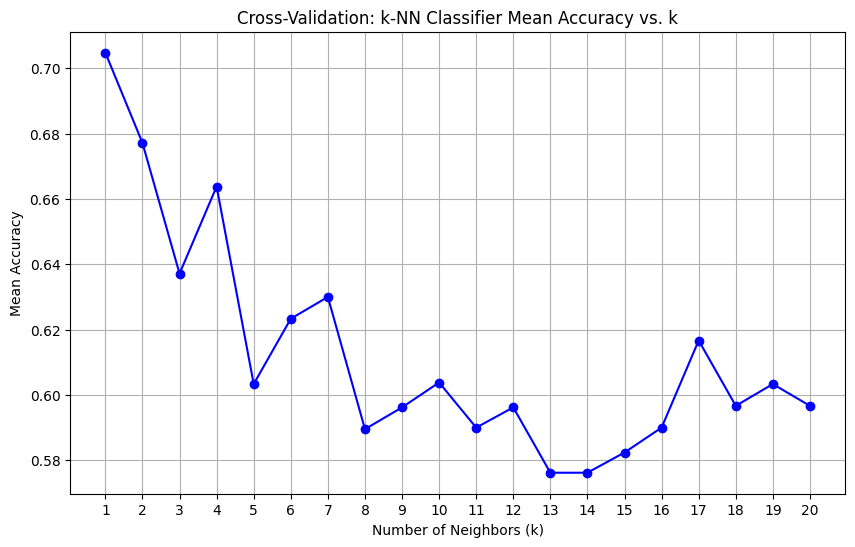

Best k based on cross-validation: k=1
Highest mean accuracy achieved: 0.70


In [11]:
from sklearn.model_selection import cross_val_score
# Initialize lists to store k values and their corresponding mean accuracies
k_values = list(range(1, 21))
mean_accuracies = []

# Perform 10-fold cross-validation for each k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Use cross_val_score to perform 10-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

# Find the best k based on cross-validation
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)

# Plot k-values vs. mean accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation: k-NN Classifier Mean Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.xticks(np.arange(1, 21, 1))
plt.show()

print(f"Best k based on cross-validation: k={best_k}")
print(f"Highest mean accuracy achieved: {best_accuracy:.2f}")


# Distance Metrics

Distance metrics play a crucial role in the k-Nearest Neighbors (k-NN) algorithm. They determine how "close" or "similar" two data points are in feature space. The choice of distance metric can significantly impact the k-NN classifier's performance. In this section, we'll explore two common distance metrics: Euclidean distance and Manhattan distance.

#### **Euclidean Distance:**


> Euclidean distance is the most common distance metric used in k-NN. It measures the straight-line distance between two points in Euclidean space. For two points, $(x_1 , y_1)$ and $(x_2 , y_2)$, the Euclidean distance is calculated as: $$Euclidean Distance= \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2 }$$
In a multi-dimensional space, the formula extends to:
$$Euclidean Distance= \sqrt{\sum_{i=1}^{n} (x_{2i}-x_{1i})^2 }$$
Euclidean distance is sensitive to differences along all dimensions and is commonly used for continuous data.

#### **Manhattan Distance:**

> Manhattan distance, also known as the "city block" distance, measures the distance between two points by summing the absolute differences along each dimension. For two points, $(x_1 , y_1)$ and $(x_2 , y_2)$, the Manhattan distance is calculated as:
$$Manhattan Distance= {|x_2-x_1| + |y_2-y_1|}$$
In a multi-dimensional space, the formula extends to:
$$Manhattan Distance= \sum_{i=1}^{n} |x_{2i}-x_{1i}| $$
Manhattan distance is less sensitive to outliers and can be more appropriate for discrete or categorical data.

### **Now, let's change the distance metrics in our model.**

Let's modify our k-NN classifier to use both Euclidean and Manhattan distances. We'll compare their performance on the glass dataset. Then, we'll visualize the decision boundaries to see the impact of the distance metric on classification.

In [12]:
# Initialize lists to store classification reports
reports_euclidean = []
reports_manhattan = []

# Test different values of k from 1 to 20 with both distance metrics
for k in range(1, 21):
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

    knn_euclidean.fit(X_train, y_train)
    knn_manhattan.fit(X_train, y_train)

    y_pred_euclidean = knn_euclidean.predict(X_test)
    y_pred_manhattan = knn_manhattan.predict(X_test)

    # Calculate and store classification reports
    report_euclidean = classification_report(y_test, y_pred_euclidean)
    report_manhattan = classification_report(y_test, y_pred_manhattan)

    reports_euclidean.append((k, report_euclidean))
    reports_manhattan.append((k, report_manhattan))

# Print classification reports for k=3 with both distance metrics
k_for_comparison = 3
print(f"Classification Report for k={k_for_comparison} (Euclidean Distance):\n{reports_euclidean[k_for_comparison-1][1]}")
print(f"Classification Report for k={k_for_comparison} (Manhattan Distance):\n{reports_manhattan[k_for_comparison-1][1]}")


Classification Report for k=3 (Euclidean Distance):
              precision    recall  f1-score   support

           1       0.58      0.79      0.67        19
           2       0.58      0.61      0.60        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.80      0.89        10

    accuracy                           0.65        65
   macro avg       0.63      0.59      0.57        65
weighted avg       0.65      0.65      0.62        65

Classification Report for k=3 (Manhattan Distance):
              precision    recall  f1-score   support

           1       0.60      0.79      0.68        19
           2       0.61      0.61      0.61        23
           3       0.50      0.25      0.33         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00     

**Interpretation:**

- Comparing the two distance metrics, the Manhattan distance metric (for k=3) generally results in higher precision, recall, and F1-scores across most classes compared to Euclidean distance.
- Manhattan distance is less sensitive to outliers, which may explain its improved performance in this case.
- The F1-scores for class 3 (Vehicle Windows Float Processed) remain low for both metrics, indicating difficulty in classifying this particular class.
- The choice of distance metric can significantly affect the k-NN classifier's performance, and it's essential to experiment with different metrics based on the dataset characteristics.

This comparison illustrates the importance of selecting an appropriate distance metric based on the specific nature of your dataset and problem.

### Thank you and good luck!